<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/emergency_arrivals_monthly_ts_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 4.1 MB/s 
     |████████████████████████████████| 6.5 MB 33.3 MB/s 
     |████████████████████████████████| 9.8 MB 46.0 MB/s 
     |████████████████████████████████| 1.4 MB 44.9 MB/s 
     |████████████████████████████████| 69 kB 6.5 MB/s 
     |████████████████████████████████| 122 kB 47.9 MB/s 
     |████████████████████████████████| 303 kB 41.4 MB/s 
     |████████████████████████████████| 3.3 MB 34.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.8 MB/s 
     |████████████████████████████████| 2.0 MB 38.7 MB/s 
     |████████████████████████████████| 11.2 MB 12.7 MB/s 
     |████████████████████████████████| 79.9 MB 136 kB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 930 kB 64.7 MB/s 
     |████████████████████████████████| 34.5 MB 17 kB/s 
  Created wheel for pyod: filename=p

In [19]:
#Arrivals
import pandas as pd
data = pd.read_csv('/content/emergency_arrivals_date_2013_onward_no_covid.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True, drop=True)
data = data.asfreq('M')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2013-01-31 to 2019-12-31
Freq: M
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Arrivals  84 non-null     int64
dtypes: int64(1)
memory usage: 1.3 KB


In [21]:
data.head(12)

,Arrivals
Date,
2013-01-31,86243
2013-02-28,74373
2013-03-31,85968
2013-04-30,82919
2013-05-31,80294
2013-06-30,79448
2013-07-31,78698
2013-08-31,84808
2013-09-30,81827


In [22]:
from pycaret.time_series import *
setup(data, fh = 7, fold = 5, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Arrivals
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(84, 1)"
5,Train data shape,"(77, 1)"
6,Test data shape,"(7, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


In [23]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,84.0
1,Summary,Statistics,Actual,Mean,,85806.22619
2,Summary,Statistics,Actual,Median,,85667.0
3,Summary,Statistics,Actual,Standard Deviation,,4488.653681
4,Summary,Statistics,Actual,Variance,,20148011.863884
5,Summary,Statistics,Actual,Kurtosis,,0.364888
6,Summary,Statistics,Actual,Skewness,,0.163121
7,Summary,Statistics,Actual,# Distinct Values,,83.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",223.259325
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",256.653011


In [24]:
plot_model(plot = 'ts')

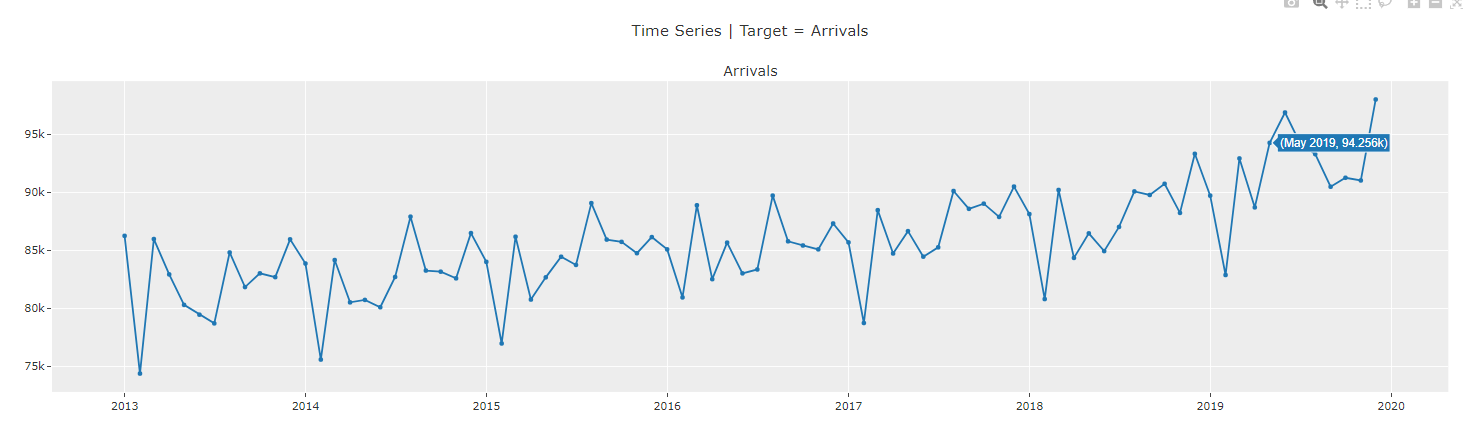

In [25]:
plot_model(plot = 'train_test_split')

In [26]:
plot_model(plot = 'diagnostics')

In [27]:
plot_model(plot = 'decomp_stl')

In [28]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
ets,ETS,1167.0917,1475.6858,0.0132,0.0133,0.7384,0.758,0.7015,0.124
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,1198.1132,1472.06,0.0135,0.0136,0.7615,0.758,0.7104,0.040
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,1234.0313,1530.5441,0.0139,0.014,0.7846,0.7883,0.6858,0.118
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1247.0298,1528.216,0.0141,0.0142,0.7906,0.7851,0.6728,0.466
exp_smooth,Exponential Smoothing,1274.4294,1577.9998,0.0144,0.0145,0.8099,0.8108,0.6658,0.092
theta,Theta Forecaster,1281.0951,1538.7976,0.0145,0.0146,0.815,0.7921,0.6974,0.052
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,1303.047,1590.324,0.0147,0.0148,0.8229,0.8146,0.6231,0.040
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,1334.655,1663.8074,0.0151,0.0152,0.8418,0.8519,0.5827,0.044
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1341.4615,1674.1353,0.0152,0.0153,0.8459,0.8571,0.5766,0.038
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1341.4626,1674.1365,0.0152,0.0153,0.8459,0.8571,0.5766,0.040


In [29]:
plot_model(best, plot = 'forecast')

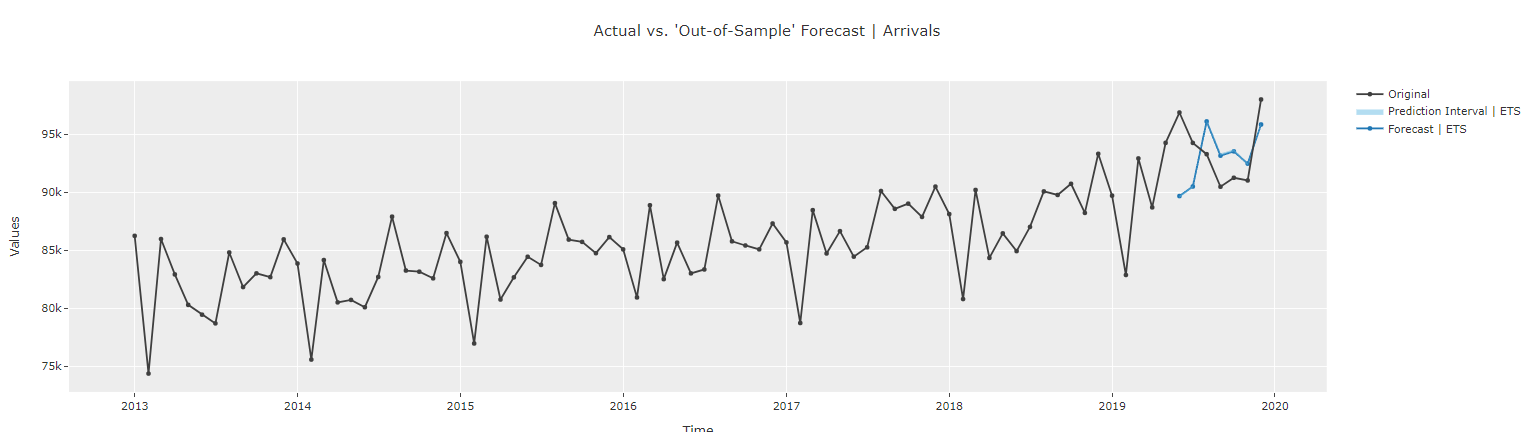

In [30]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 48})

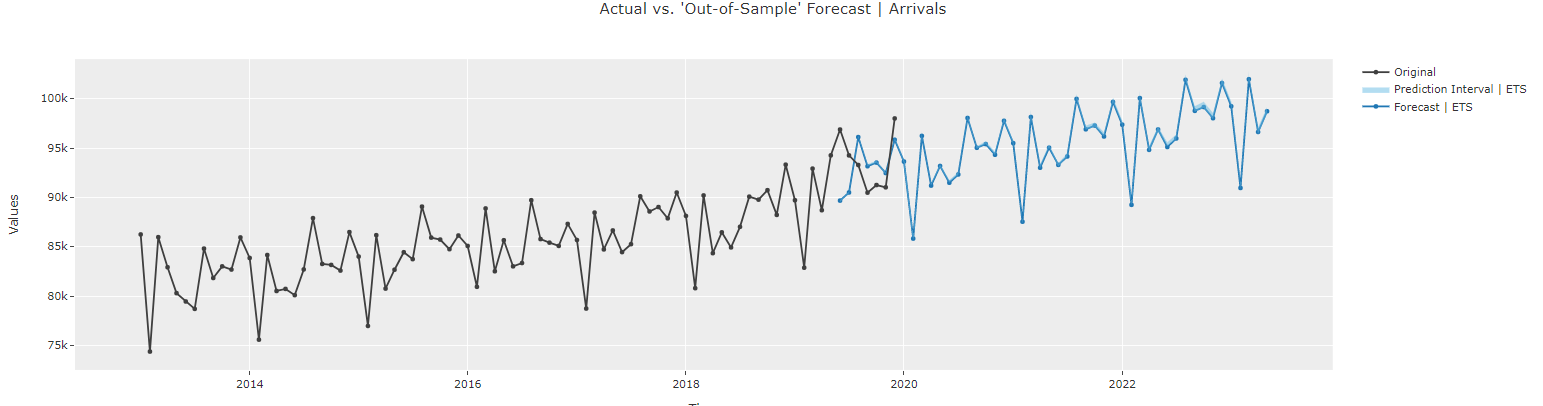

In [31]:
plot_model(best, plot = 'residuals')

In [32]:
plot_model(best, plot = 'insample')

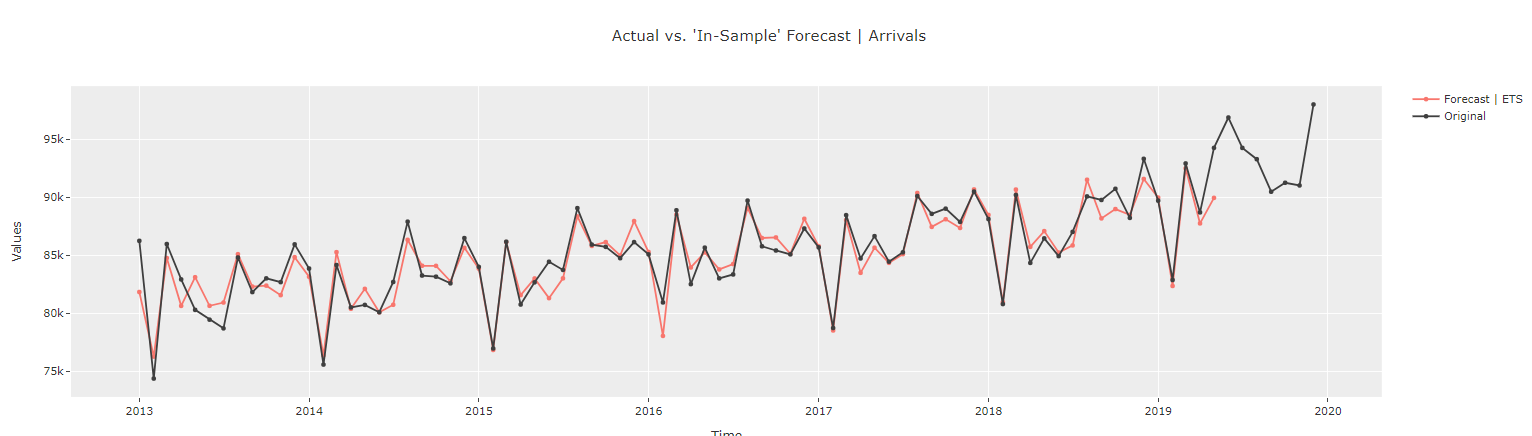

In [33]:
plot_model(best, plot = 'diagnostics')

In [17]:
final_best = finalize_model(best)

In [34]:
predict_model(best, fh = 50)

,y_pred
2019-06,89670.2771
2019-07,90493.9041
2019-08,96107.0074
2019-09,93150.8654
2019-10,93522.7498
2019-11,92464.3871
2019-12,95840.6674
2020-01,93626.5330
2020-02,85821.2096
2020-03,96229.0074


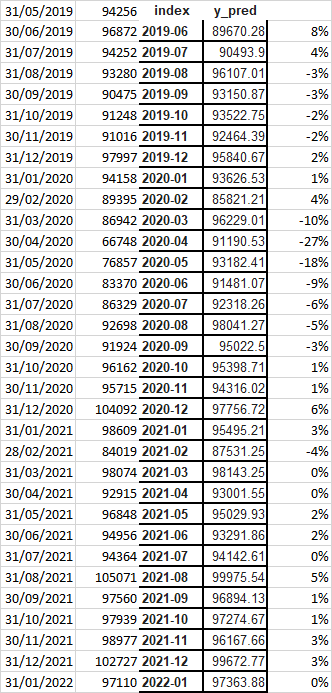